Best Mean Cross Validation Score is 0.8501863354037267 for StackingClassifier

Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9113607990012484
Test score is 0.8222222222222222
    

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('xgbc',
                                                       XGBClassifier(base_score=0.5,
                                                                     booster='gbtree',
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=1,
                                                                     early_stopping_rounds=2,
                                                                     gamma=0,
                                                                     learning_rate=0.2,
                                                                     max_delta_step=0,
                                                                     max_depth=6,
                                                                     min_child_weight=7,
                                                                     missing=None,
                                                                     n_estimators=200,
                                                                     n_jobs=1,
                                                                     nthread=None,
                                                                     objec...
                                                                             n_jobs=None,
                                                                             penalty='l2',
                                                                             random_state=None,
                                                                             solver='lbfgs',
                                                                             tol=0.0001,
                                                                             verbose=0,
                                                                             warm_start=False),
                                          n_jobs=None, passthrough=False,
                                          stack_method='auto', verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'final_estimator__C': [0.1, 0.2],
                         'stack_method': ['auto', 'predict_proba']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)



 
    

XGB



Best Mean Cross Validation Score is 0.8489130434782609
Best Mean Cross Validation Score is {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 200, 'subsample': 0.6}
Train score is 0.8913857677902621
Test score is 0.8333333333333334


# Results
- Models used with hyperparameters 
- Best Model parameters 
- Mean Cross validation score of Best model
- Test score of best model 
- Train score of best model 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
!pip install feature-engine

In [0]:
data = pd.read_csv('titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [0]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [0]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [0]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [0]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [0]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [0]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Sir.           1
the            1
Lady.          1
Mme.           1
Ms.            1
Capt.          1
Jonkheer.      1
Don.           1
Name: Title, dtype: int64

In [0]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [0]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [0]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [0]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [0]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [0]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

In [0]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     801 non-null    int64  
 1   Sex        801 non-null    object 
 2   Age        643 non-null    float64
 3   SibSp      801 non-null    int64  
 4   Parch      801 non-null    int64  
 5   Fare       801 non-null    float64
 6   Embarked   799 non-null    object 
 7   Cabin_num  175 non-null    float64
 8   Cabin_cat  179 non-null    object 
 9   Title      801 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


In [0]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [0]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [0]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [0]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)

## <span class="mark">DO NOT CHANGE STEPS BEFORE THIS POINT</span>

In [0]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter= 5000).fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))

Mean Cross-validation scores: 0.8277406832298138

Logistic.coef_: [[-7.85863078e-01 -3.53158137e-02 -5.17392041e-01 -2.91806266e-01
   5.22366933e-03  6.58245960e-05 -1.49058278e+00 -2.88631072e-01
   1.22058439e-01 -2.82756299e-01 -3.57417870e-01  2.68499697e-01
   4.66248883e-01 -6.31518885e-01  1.02518016e+00 -5.95779499e-01
  -1.24587977e+00  1.54113724e+00  8.19087060e-01  2.90533696e-02]]
Logistic.intercept_: [4.3633671]
Logistic Performance:  0.8555555555555555


In [0]:
logreg=LogisticRegression(max_iter=10000)
from sklearn.model_selection import GridSearchCV
logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l1','l2']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, )
logreg_grid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8277406832298138
Best Mean Cross Validation Score is {'C': 1, 'penalty': 'l2'}
Train score is 0.83270911360799
Test score is 0.8555555555555555


In [0]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(6,9)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.7179

KNN parameters:  {'n_neighbors': 7}
KNN Test Performance:  0.8111111111111111


# hw2 best model

In [0]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'criterion':['gini','entropy'],
                'max_depth': range(5,10) ,
               'min_samples_split': range(12,16)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))



Best Mean Cross-validation score: 0.8352

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 14}
Decision Tree Performance:  0.8111111111111111


In [0]:
print("Train score is:{:.4f}".format(grid_dtree.score(X_train,y_train)))
print("Test score is:{:.4f}".format(grid_dtree.score(X_test,y_test)))

Train score is:0.8964
Test score is:0.8111


In [0]:
# Linear SVC
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(max_iter=100000)
lin_svc.fit(X_train,y_train)
LinearSVC_cv_score = cross_val_score(lin_svc,X_train,y_train)
print("mean cv_score is :{:.4f}".format(LinearSVC_cv_score.mean()))
#print("Train score is:{:.4f}".format(LinearSVC_cv_score.score(X_train,y_train)))
#print("Test score is:{:.4f}".format(LinearSVC_cv_score.score(X_test,y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

mean cv_score is :0.8277


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#Support Vector machines
from sklearn.svm import SVC
param_grid = [{'kernel': ['rbf'],
               'C': [200,300,500,1000],
               'gamma': [0.001,.01,.03,0.1,.2]}
              ]
grid_search_svc_rbf = GridSearchCV(SVC(probability = True), param_grid, cv=5,
                          return_train_score=True,n_jobs = -1)
grid_search_svc_rbf.fit(X_train, y_train)
print('train score: {:.4f}'.format(grid_search_svc_rbf.score(X_train, y_train)))
print('test score: {:.4f}'.format(grid_search_svc_rbf.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_svc_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svc_rbf.best_score_))

train score: 0.8826
test score: 0.8444
Best parameters: {'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.8003


In [0]:
from sklearn.svm import SVC
param_grid = [
              {'kernel': ['linear'],
               'C': [.001,.01,1,2],
              'tol':[1,2,5]},
            ]
grid_search_svc_lr = GridSearchCV(SVC(probability = True), param_grid, cv=5,
                          return_train_score=True,n_jobs = -1)

In [0]:
grid_search_svc_lr.fit(X_train, y_train)
print('train score: {:.4f}'.format(grid_search_svc_lr.score(X_train, y_train)))
print('test score: {:.4f}'.format(grid_search_svc_lr.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_svc_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svc_lr.best_score_))

train score: 0.8327
test score: 0.8333
Best parameters: {'C': 1, 'kernel': 'linear', 'tol': 1}
Best cross-validation score: 0.8253


In [0]:
from sklearn.svm import SVC
param_grid = [
             {'kernel': ['poly'],
               'C': [.01,5,10,100],
              'tol':[.01,5,10,100],
            'degree':[1,2,3] }
            ]
grid_search_svc_poly = GridSearchCV(SVC(probability = True), param_grid, cv=5,
                          return_train_score=True,n_jobs = -1)
grid_search_svc_poly.fit(X_train, y_train)
print('train score: {:.4f}'.format(grid_search_svc_poly.score(X_train, y_train)))
print('test score: {:.4f}'.format(grid_search_svc_poly.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_svc_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svc_poly.best_score_))

train score: 0.8065
test score: 0.8111
Best parameters: {'C': 100, 'degree': 1, 'kernel': 'poly', 'tol': 0.01}
Best cross-validation score: 0.8028


train score: 0.8315
test score: 0.8444
Best parameters: {'C': 10, 'degree': 1, 'kernel': 'poly', 'tol': 0.01}
Best cross-validation score: 0.8240

In [0]:
from sklearn.svm import SVC
param_grid = [
             {'kernel': ['sigmoid'],
               'C': [.001,.01,1,],
              'tol':[.001,.01,1]}]
grid_search_svc_sigmoid = GridSearchCV(SVC(probability = True), param_grid, cv=5,
                          return_train_score=True,n_jobs = -1)
grid_search_svc_sigmoid.fit(X_train, y_train)
print('train score: {:.4f}'.format(grid_search_svc_sigmoid.score(X_train, y_train)))
print('test score: {:.4f}'.format(grid_search_svc_sigmoid.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_svc_sigmoid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svc_sigmoid.best_score_))
print(f'Train score is {grid_search_svc_sigmoid.score(X_train,y_train)}')
print(f'Test score is {grid_search_svc_sigmoid.score(X_test,y_test)}')

train score: 0.6217
test score: 0.5667
Best parameters: {'C': 0.001, 'kernel': 'sigmoid', 'tol': 0.001}
Best cross-validation score: 0.6217
Train score is 0.6217228464419475
Test score is 0.5666666666666667


train score: 0.6217
test score: 0.5667
Best parameters: {'C': 0.01, 'kernel': 'sigmoid', 'tol': 0.01}
Best cross-validation score: 0.6217

# Bagging


## Btree

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [0]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402096273291926
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9413233458177278
Test score is 0.8


Best Mean Cross Validation Score is 0.8401997503121099
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.9225967540574282
Test score is 0.8111111111111111

In [0]:
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [.01,0.7,0.8,0.9],
                 'n_estimators': [5,10,12,15]}
bag_dtree1_grid1 = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [0]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid1.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid1.best_params_}')
print(f'Train score is {bag_dtree1_grid1.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid1.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8339518633540373
Best Mean Cross Validation Score is {'base_estimator__max_depth': 7, 'max_samples': 0.8, 'n_estimators': 12}
Train score is 0.9013732833957553
Test score is 0.8333333333333334


Best Mean Cross Validation Score is 0.8401997503121099
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.9225967540574282
Test score is 0.8111111111111111

In [0]:
bag_dtree2 = BaggingClassifier(DecisionTreeClassifier(criterion= 'gini', max_depth = 8, min_samples_split= 14), bootstrap=True, random_state=0)

bag_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
bag_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=8,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                            

In [0]:
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_params_}')
print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8364751552795031
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.8963795255930087
Test score is 0.8


# pasting


In [0]:
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, n_jobs = -1)
paste_dtree1_grid.fit(X_train,y_train)


print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402018633540372
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9288389513108615
Test score is 0.8


In [0]:
paste_dtree2 = BaggingClassifier(DecisionTreeClassifier(criterion= 'gini', max_depth = 8, min_samples_split= 14), bootstrap=True, random_state=0)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [100,150]}
paste_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)


print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8364751552795031
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.8963795255930087
Test score is 0.8


# Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [150,180,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,n_jobs = -1 )
rfc_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8427173913043479
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 150}
Train score is 0.8826466916354557
Test score is 0.8333333333333334


Best Mean Cross Validation Score is 0.83645443196005
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8876404494382022
Test score is 0.8333333333333334

# extra  tree

In [0]:
from  sklearn.ensemble import ExtraTreesClassifier

In [0]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500,600,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8,9,10,15],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, n_jobs = -1 )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [0]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8327329192546584
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 800}
Train score is 0.885143570536829
Test score is 0.8444444444444444


est Mean Cross Validation Score is 0.83270911360799
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.885143570536829
Test score is 0.8333333333333334

# ada boost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True,n_jobs = -1 )
adc_dtree_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8189906832298137
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__splitter': 'best', 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9425717852684145
Test score is 0.8222222222222222


# gradient boost

In [0]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,n_jobs = -1 )
gbc_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8289829192546584
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9300873907615481
Test score is 0.8222222222222222


# xgboost (best)

In [0]:
pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150,200],
              'learning_rate' : [.01,0.1,0.2],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.1,0.6]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, n_jobs = -1 )
xgbc_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8489130434782609
Best Mean Cross Validation Score is {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 200, 'subsample': 0.6}
Train score is 0.8913857677902621
Test score is 0.8333333333333334


Best Mean Cross Validation Score is 0.850187265917603
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.6}
Train score is 0.8813982521847691
Test score is 0.8333333333333334

Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.6}
Train score is 0.8813982521847691
Test score is 0.8333333333333334

In [0]:
classifiers={
    'logit':logreg_grid,
'knn':grid_knn,
'dtree':grid_dtree,
'svc_rbf':grid_search_svc_rbf,
'svc_lr':grid_search_svc_lr,
'svc_poly':grid_search_svc_poly,
#'svc_sig':grid_search_svc_sigmoid,
            'bag_dtree1':bag_dtree1_grid, 
            'bag_dtree2':bag_dtree2_grid,
           #  'bag_svrP':bag_svrP_grid1,
            'paste_dtree1': paste_dtree1_grid,
            'paste_dtree2': paste_dtree2_grid,
           #  'paste_svrP': paste_svrP_grid,
             'rfc': rfc_grid,          
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
	     'etc': etc_grid,
             'xgbc': xgbc_grid}



In [0]:
classifiers.keys()

dict_keys(['logit', 'knn', 'dtree', 'svc_rbf', 'svc_lr', 'svc_poly', 'bag_dtree1', 'bag_dtree2', 'paste_dtree1', 'paste_dtree2', 'rfc', 'adc_dtree', 'gbc', 'etc', 'xgbc'])

In [0]:
classifiers.keys()

dict_keys(['logit', 'knn', 'dtree', 'svc_rbf', 'svc_lr', 'svc_poly', 'bag_dtree1', 'bag_dtree2', 'paste_dtree1', 'paste_dtree2', 'rfc', 'adc_dtree', 'gbc', 'etc', 'xgbc'])

In [0]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [0]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [0]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df.head(6)

,model,mean,std
14,xgbc,0.848913,0.022989
10,rfc,0.842717,0.017196
6,bag_dtree1,0.840210,0.019516
8,paste_dtree1,0.840202,0.028103
7,bag_dtree2,0.836475,0.026783
9,paste_dtree2,0.836475,0.026783


In [0]:
accuracy_df.to_csv('accuracy_df_class.csv')

In [0]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [0]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)


In [0]:
pred = pd.DataFrame(predictions_all)

# corr

In [0]:
pred.to_csv('pred_class.csv')

# corr

Text(0.5, 1.0, 'Correlation of the test set label prediction between models')

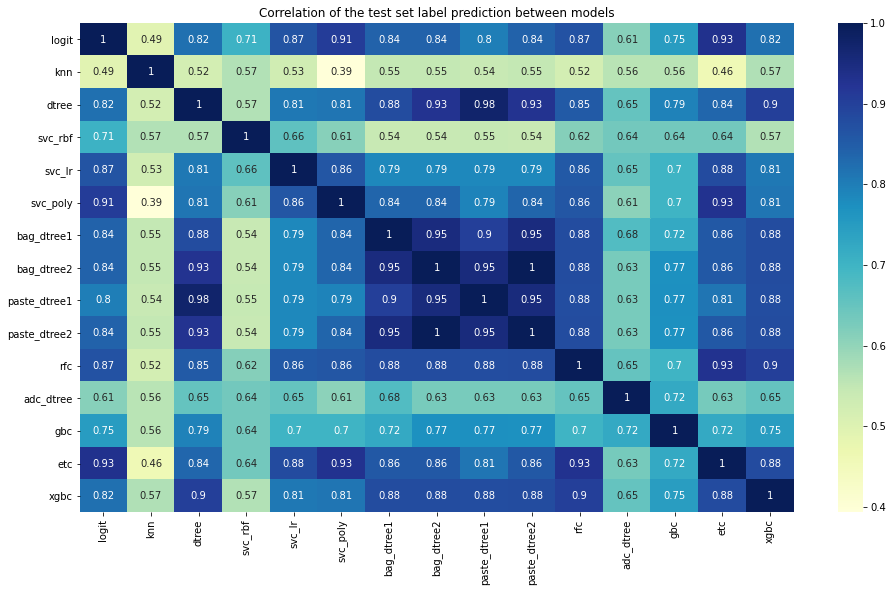

In [0]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
g = sns.heatmap(pred.corr(), annot=True, cmap='YlGnBu', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [0]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [0]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 15))

Top Absolute Correlations
knn      svc_poly        0.392953
         etc             0.459657
logit    knn             0.493899
knn      rfc             0.522383
         dtree           0.522383
         svc_lr          0.527311
svc_rbf  bag_dtree2      0.544398
         bag_dtree1      0.544398
         paste_dtree2    0.544398
knn      paste_dtree1    0.544444
svc_rbf  paste_dtree1    0.545791
knn      paste_dtree2    0.548491
         bag_dtree2      0.548491
         bag_dtree1      0.548491
         gbc             0.559957
dtype: float64


In [0]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 15))

Top Absolute Correlations
knn      svc_poly        0.392953
         etc             0.459657
logit    knn             0.493899
knn      rfc             0.522383
         dtree           0.522383
         svc_lr          0.527311
svc_rbf  bag_dtree2      0.544398
         bag_dtree1      0.544398
         paste_dtree2    0.544398
knn      paste_dtree1    0.544444
svc_rbf  paste_dtree1    0.545791
knn      paste_dtree2    0.548491
         bag_dtree2      0.548491
         bag_dtree1      0.548491
         gbc             0.559957
dtype: float64


# Voting top 5

In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor

In [0]:
vclf1 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_), 
                               ('bag_dtree1', bag_dtree1_grid.best_estimator_),
                               ('paste_dtree1', paste_dtree1_grid.best_estimator_),
                               ('bag_dtree2', bag_dtree2_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('xgbc',
                                                     XGBClassifier(base_score=0.5,
                                                                   booster='gbtree',
                                                                   colsample_bylevel=1,
                                                                   colsample_bynode=1,
                                                                   colsample_bytree=1,
                                                                   early_stopping_rounds=2,
                                                                   gamma=0,
                                                                   learning_rate=0.2,
                                                                   max_delta_step=0,
                                                                   max_depth=6,
                                                      

## Voting top cv

In [0]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8476863354037267
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.9088639200998752
Test score is 0.8222222222222222


## Voting corr

In [0]:
vclf2 = VotingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('adc_dtree', adc_dtree_grid.best_estimator_), 
                               ('svc_poly', grid_search_svc_poly.best_estimator_),
                               ('svc_rbf', grid_search_svc_rbf.best_estimator_),
                                                            ], )
#knn adc_dtree svc_poly svc rbf
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True, )
vclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=7,
                                                                          p=2,
                                                                          weights='uniform')),
                                                    ('adc_dtree',
                                                     AdaBoostClassifier(algorithm='SAMME.R',
                           

In [0]:
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8252639751552795
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9026217228464419
Test score is 0.8555555555555555


# Stacking

In [0]:
from sklearn.ensemble import StackingClassifier

## Stacking top cv (best)


In [0]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_), 
                               ('bag_dtree1', bag_dtree1_grid.best_estimator_),
                               ('paste_dtree1', paste_dtree1_grid.best_estimator_),
                               ('bag_dtree2', bag_dtree2_grid.best_estimator_)
                              ],  final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('xgbc',
                                                       XGBClassifier(base_score=0.5,
                                                                     booster='gbtree',
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=1,
                                                                     early_stopping_rounds=2,
                                                                     gamma=0,
                                                                     learning_rate=0.2,
                                                                     max_delta_step=0,
                                                               

In [0]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8501863354037267
Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9113607990012484
Test score is 0.8222222222222222


## Stacking corr

In [0]:
sclf2 = StackingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('adc_dtree', adc_dtree_grid.best_estimator_), 
                               ('svc_poly', grid_search_svc_poly.best_estimator_),
                               ('svc_rbf', grid_search_svc_rbf.best_estimator_) ],
                           final_estimator=
                           XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=7,
                                                                            p=2,
                                                                            weights='uniform')),
                                                      ('adc_dtree',
                                                 

In [0]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.833998447204969
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 2, 'final_estimator__min_child_weight': 7, 'final_estimator__n_estimators': 50, 'final_estimator__subsample': 0.6, 'stack_method': 'predict_proba'}
Train score is 0.9151061173533084
Test score is 0.8555555555555555
